# Imports

In [2]:
# seperação do dataset de forma balanceada 
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from modules.preprocessing import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score 
from time import perf_counter
import matplotlib.pyplot as plt

import pandas as pd

# Global variables

In [2]:
svm = SVC(class_weight='balanced', gamma='auto')
stratified_method = StratifiedKFold(n_splits=5)

# Spliting proportionally the whole dataset into a training and testing dataset

In [3]:
def spliting_train_test(dataset):
    
    X = dataset.drop(columns=['y']).values
    y = dataset.y
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    sss.get_n_splits(X, y)

    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return X_train, X_test, y_train, y_test

# Function to find the delta

In [4]:
def find_delta(csv_path):
    
    # reading the raw dataset
    packages = pd.read_csv(csv_path, low_memory=False, index_col=[0])
    
    # defining the values of delta
    deltas = ['1s', '2s', '3s', '4s', '5s']
    columns = ['Delta', 'F1 Score (mean)', 'F1 Score (std)', 'Cross Val Output']
    results = list()
    
    for count, delta in enumerate(deltas):
        
        initial_time = perf_counter()
        
        porcentage = (count + 1) / len(deltas)
        porcentage = round(porcentage * 100, 2)
        
        print('{}% complete'.format(porcentage))
        
        # creating preprocessing dataset
        dataset = preprocessing(packages, delta)
        # spliting proportionally the whole dataset into a training and testing dataset
        X_train, _, y_train, _ = spliting_train_test(dataset)
        # applying the cross validation with 5 folds, using the metric f1 score
        f1_score = cross_val_score(svm, X_train, y_train, scoring='f1', cv=stratified_method, n_jobs=-1)
        # the f1 score's mean and std
        mean, std = f1_score.mean(), f1_score.std()
    
        # gathering the results into a tuple
        results.append([delta, mean, std, [f1_score]])
        
        #printing the time
        print('Time of delta {}: {}'.format(delta ,perf_counter() - initial_time))
        
    return pd.DataFrame(results, index=deltas, columns=columns)

In [5]:
metrics = find_delta('SUEE1_TCP.csv')

/home/aline/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


20.0% complete
Time of delta 1s: 1244.8645551589998
40.0% complete
Time of delta 2s: 802.1103499849996
60.0% complete
Time of delta 3s: 639.9170427219997
80.0% complete
Time of delta 4s: 486.72537159400053
100.0% complete
Time of delta 5s: 455.5907445359999


In [16]:
metrics

,Delta,F1 Score (mean),F1 Score (std),Cross Val Output
1s,1s,0.711687,0.004455,"[[0.7106325706594886, 0.7178106774338269, 0.70..."
2s,2s,0.682426,0.017056,"[[0.674901185770751, 0.6593195975083852, 0.703..."
3s,3s,0.697098,0.005478,"[[0.6977708657335406, 0.6895822316234796, 0.69..."
4s,4s,0.692294,0.008688,"[[0.6820809248554913, 0.6836027713625865, 0.70..."
5s,5s,0.702818,0.010298,"[[0.6948245092207019, 0.6888888888888889, 0.70..."


In [7]:
metrics.to_csv("results_s_final.csv")

In [ ]:
!cat results.csv

# Creating the plot

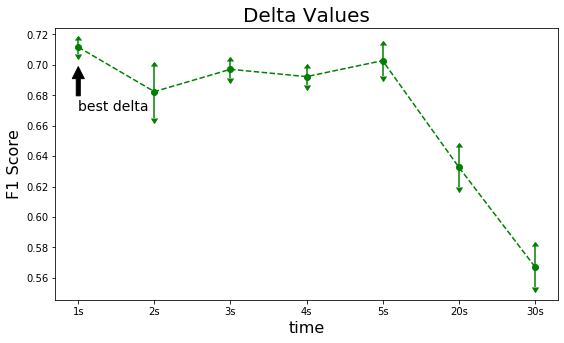

In [4]:
plt.figure(figsize=(9, 5))

deltas = ['1s', '2s', '3s', '4s', '5s', '20s', '30s']
std = [0.004455, 0.017056, 0.005478, 0.005478, 0.010298, 0.012944, 0.013684]

#creating the dots

plt.errorbar(deltas, [0.711687, 0.682426, 0.697098, 0.692294, 0.702818, 0.632836, 0.567365], std, 
             linestyle='--', fmt='-o', color='green', uplims=True, lolims=True)
plt.ylabel('F1 Score', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.title('Delta Values', fontsize=20)
plt.annotate('best delta', fontsize=14, xy=('1s', 0.70), xytext=('1s', 0.67), arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig("deltaValues.svg")

plt.show()